STOCK PRICE PREDICTION OF APPLE COMPANY

Using Long Short Term Memory(LSTM)

Importing the Libraries

In [30]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import seaborn as sn
plt.style.use('fivethirtyeight')

Getting the data

In [78]:
import yfinance as yf

# Define the ticker symbol and date range
ticker_symbol = "AAPL"
start_date = "2011-01-01"
end_date = "2022-07-01"

# Fetch the data using yfinance
df = yf.download(ticker_symbol, start=start_date, end=end_date)
d_f = pd.DataFrame(df)
desired_order = ['High','Low','Open','Close','Volume','Adj Close']
d_f = d_f[desired_order] 


# Print the DataFrame
print(d_f)


[*********************100%%**********************]  1 of 1 completed
                  High         Low        Open       Close     Volume  \
Date                                                                    
2011-01-03   11.795000   11.601429   11.630000   11.770357  445138400   
2011-01-04   11.875000   11.719643   11.872857   11.831786  309080800   
2011-01-05   11.940714   11.767857   11.769643   11.928571  255519600   
2011-01-06   11.973214   11.889286   11.954286   11.918929  300428800   
2011-01-07   12.012500   11.853571   11.928214   12.004286  311931200   
...                ...         ...         ...         ...        ...   
2022-06-24  141.910004  139.770004  139.899994  141.660004   89116800   
2022-06-27  143.490005  140.970001  142.699997  141.660004   70207900   
2022-06-28  143.419998  137.320007  142.130005  137.440002   67083400   
2022-06-29  140.669998  136.669998  137.460007  139.229996   66242400   
2022-06-30  138.369995  133.770004  137.250000  136.720

Getting the number of rows and column in the dataset

In [79]:
df.shape

(2893, 6)

Visualising the data 

<Axes: title={'center': 'Closing Stock Price History'}, xlabel='Date', ylabel='Closing Price USD ($)'>

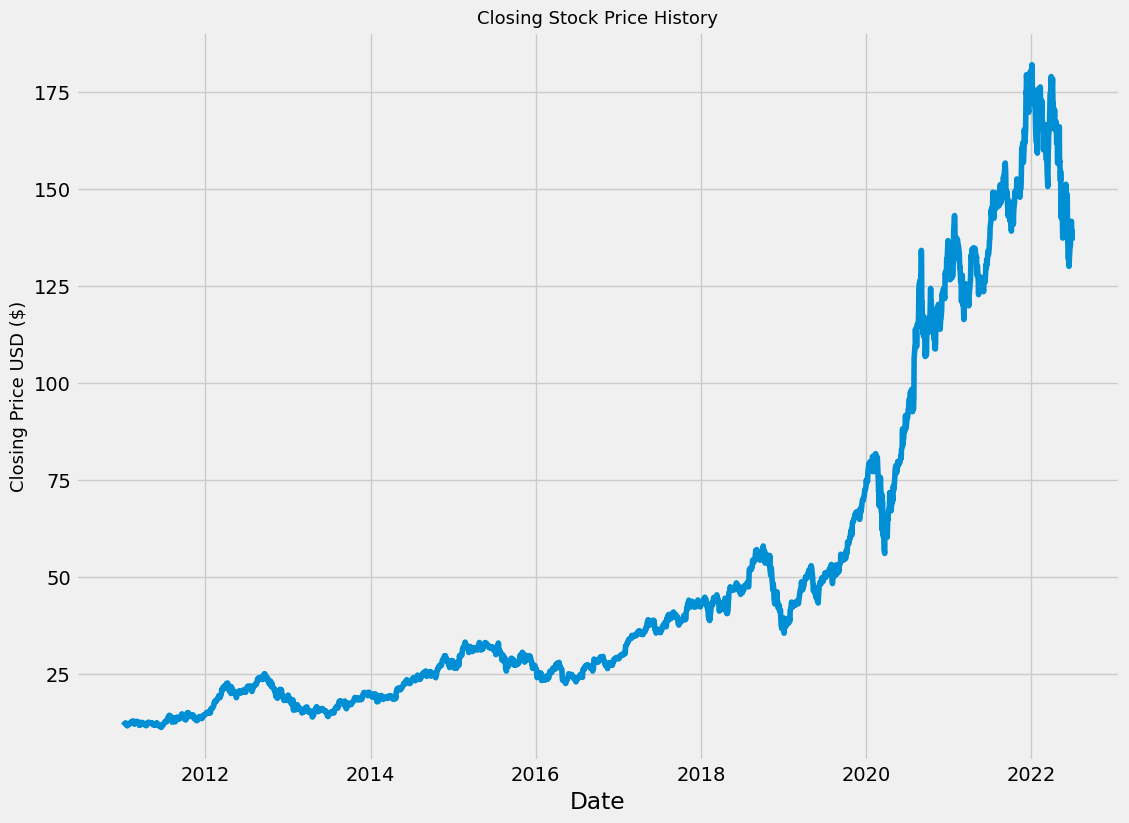

In [80]:
plt.figure(figsize = (12,9)) #plot size
plt.title('Closing Stock Price History', fontsize = 13) # setting plot title
plt.ylabel('Closing Price USD ($)', fontsize = 13)
sn.lineplot(data = df, x = 'Date', y = 'Close')

Creating a new dataframe with only the close column

In [97]:
data = df.filter(['Close'])

dataset = data.values

training_data_len =math.ceil(len(dataset) * .9)

training_data_len

2604

Scaling the data

In [82]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00298057],
       [0.00334033],
       [0.00390716],
       ...,
       [0.73897296],
       [0.74945617],
       [0.73475623]])

Creating training dataset

In [98]:
train_data = scaled_data[0:training_data_len, :]

# spliting data into x and y 
x_train = []
y_train = []
for i in range (80, len(train_data)):
  x_train.append(train_data[i-80:i, 0])
  y_train.append(train_data[i, 0])
  if i<=85:
    print(x_train)
    print(y_train)
    print()

[array([0.00298057, 0.00334033, 0.00390716, 0.00385069, 0.00435059,
       0.00567459, 0.00550517, 0.00608664, 0.00635018, 0.00693584,
       0.00529809, 0.00491952, 0.00363107, 0.00238446, 0.00462878,
       0.00545497, 0.00596742, 0.00583355, 0.0043464 , 0.00501991,
       0.00621423, 0.00606573, 0.00588166, 0.0065217 , 0.007647  ,
       0.00834142, 0.00896054, 0.00820337, 0.00868654, 0.00917389,
       0.00932448, 0.01000009, 0.00898983, 0.00737091, 0.0048714 ,
       0.00571015, 0.00576453, 0.00686891, 0.00792519, 0.00710945,
       0.0076972 , 0.00925337, 0.00934541, 0.00837489, 0.00845855,
       0.0077704 , 0.00655726, 0.00767   , 0.00799839, 0.0062979 ,
       0.0030726 , 0.00404103, 0.00321065, 0.00501573, 0.00541313,
       0.00499272, 0.00620168, 0.00757588, 0.0073458 , 0.00745457,
       0.00696721, 0.00694212, 0.00611592, 0.00541105, 0.00492997,
       0.00475218, 0.00476055, 0.00412888, 0.00323785, 0.00357251,
       0.00435268, 0.00357669, 0.00253924, 0.00345746, 0.0047

Converting the dataset into numpy array

In [84]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [85]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) # 1 is just the number of features that is the closing price. 
x_train.shape

(2524, 80, 1)

Building the model

In [ ]:
model = Sequential()
model.add (LSTM (80, return_sequences= True, input_shape= (x_train.shape[1], 1 )))
model.add (LSTM (80, return_sequences= False))
model.add(Dense(20))
model.add(Dense(1))

Compiling the model

In [87]:
model.compile(optimizer='adam', loss='mean_squared_error')

Training the model

In [ ]:
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

Creating testing dataset

In [ ]:
#scales values from 2168 to 2497
test_data= scaled_data[training_data_len -80: , :]
#x_test and y_test
x_test =[]
y_test = dataset [training_data_len:, :]
for i in range (80, len (test_data)):
  x_test.append(test_data[i-80:i, 0])

Converting test data to a numpy array

In [100]:
x_test=np.array(x_test) #so we can predict using LSTM model

Reshaping data from 2D to 3D for LSTM 

In [101]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Getting predicted values

In [102]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

10/10 [==============================] - 0s 43ms/step


Getting root mean squared error

In [103]:
#shows how better the model predict
rmse = np.sqrt( np.mean(predictions - y_test)**2)
rmse

3.0193104727457962

Ploting the data

C:\Users\HP\AppData\Local\Temp\ipykernel_11032\3398799266.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


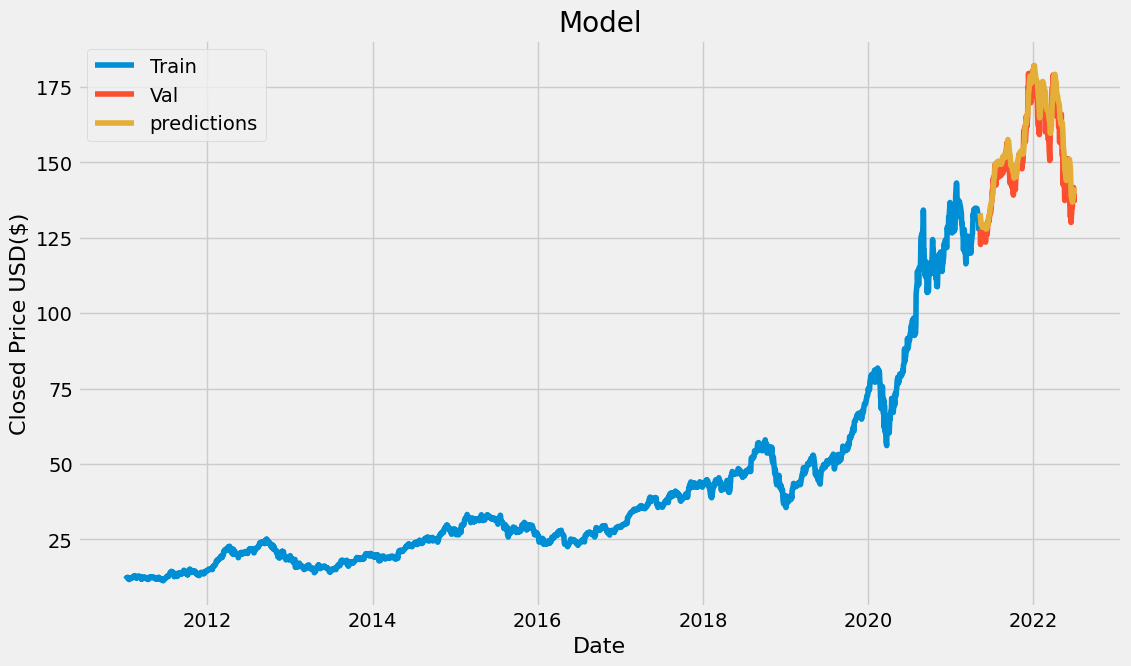

In [105]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions


# visaulizing the predicted data
plt.figure(figsize=(12, 7))
plt.title('Model')
plt.xlabel('Date', fontsize=16)
plt.ylabel('Closed Price USD($)', fontsize = 16)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train', 'Val', 'predictions'], loc= 'upper left')
plt.show()

In [106]:
valid

,Close,predictions
Date,,
2021-05-10,126.849998,133.130402
2021-05-11,125.910004,132.449356
2021-05-12,122.769997,131.595200
2021-05-13,124.970001,130.294769
2021-05-14,127.449997,129.362823
...,...,...
2022-06-24,141.660004,137.596634
2022-06-27,141.660004,139.050629
2022-06-28,137.440002,140.584717


Visualizing predicted and actual values 

<Axes: title={'center': 'Actual values compared with model predictions'}, xlabel='Date', ylabel='Price USD ($)'>

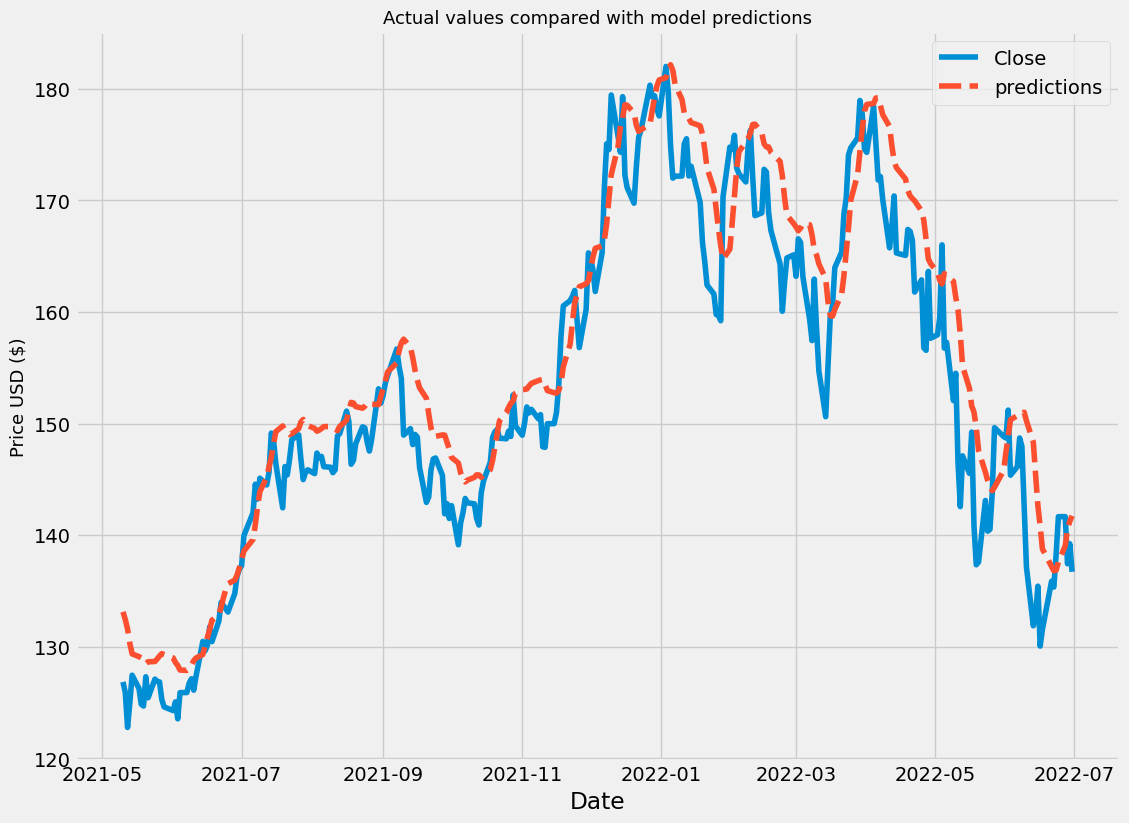

In [107]:
 plt.figure(figsize = (12,9)) #plot size
plt.title('Actual values compared with model predictions', fontsize = 13) # setting plot title
plt.ylabel('Price USD ($)', fontsize = 13)
sn.lineplot(data = valid) # defining plot itself